In [1]:
import msmexplorer as msme
import numpy as np
%pylab inline
import seaborn as sns 
sns.set_style("whitegrid")
sns.set_context("poster",1.3)
from msmbuilder.utils import load

/Users/muneeb/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/muneeb/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


# In this notebook, we simply compare the results of running metadynamics along traditional phi or psi dihedrals vs using supervised machine learning

In [2]:
import mdtraj as md
from msmbuilder.featurizer import DihedralFeaturizer

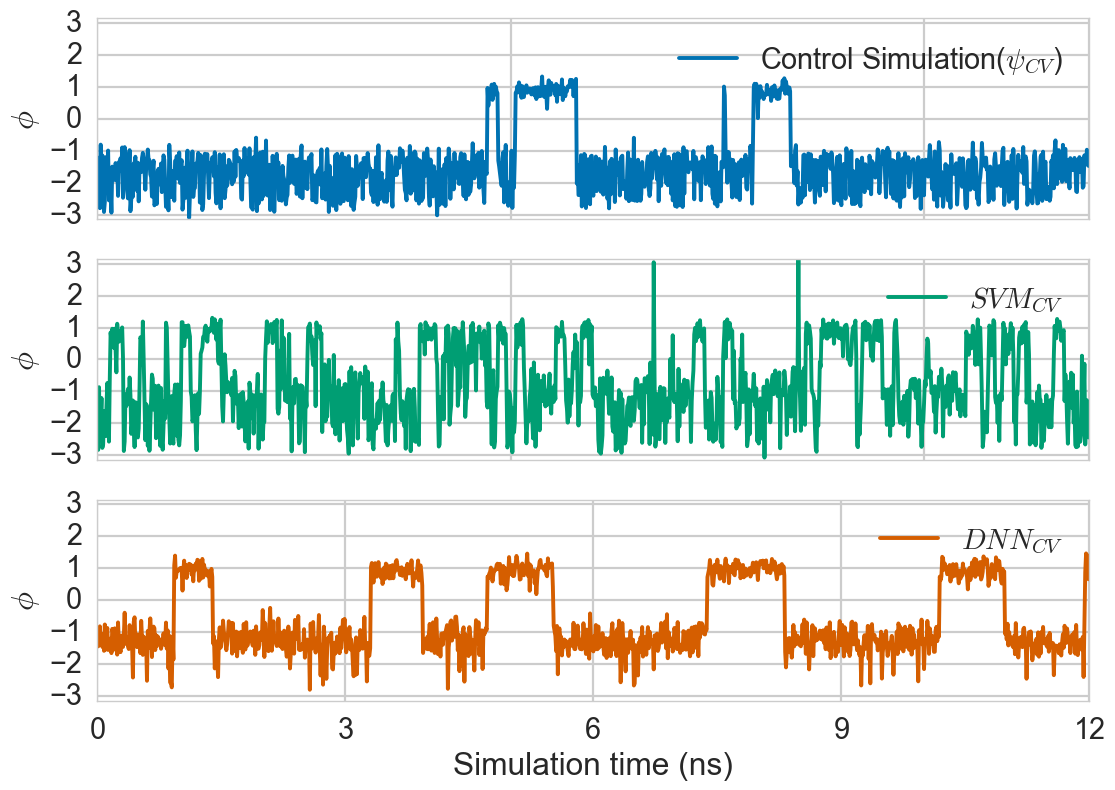

In [5]:
title_list = ["Control Simulation("+r'$\psi_{CV}$)',r'$SVM_{CV}$',r'$DNN_{CV}$']

for i,f in enumerate(["control_meta_traj_1","svm_meta_traj_lowc","dnn_meta_traj"]):
    subplot(3,1,i+1)
    test_traj = md.load("%s//reweight//trajectory.dcd"%f,top="./0.pdb")
    plot_test_feat = DihedralFeaturizer(sincos=False).transform([test_traj])[0]
    plot(plot_test_feat[:1200,0],label=title_list[i],c=sns.color_palette("colorblind")[i])

    if i==2:
        xticks([0,300,600,900,1200],[0,3,6,9,12])
        xlabel("Simulation time (ns)")
    else:
        xticks([0,500,1000,1200],[])
    ylim([-pi,pi])
    ylabel(r'$\phi$')
    legend()

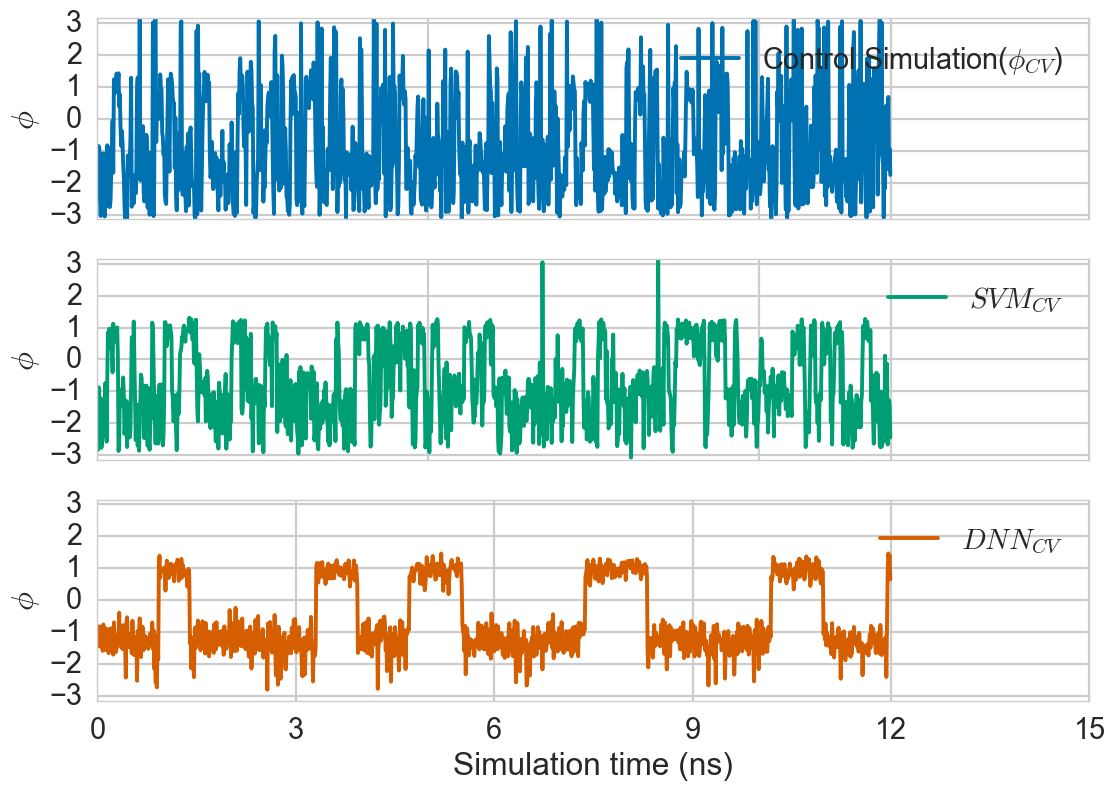

In [10]:
title_list = ["Control Simulation("+r'$\phi_{CV}$)',r'$SVM_{CV}$',r'$DNN_{CV}$']

for i,f in enumerate(["control_meta_traj_2","svm_meta_traj_lowc","dnn_meta_traj"]):
    subplot(3,1,i+1)
    test_traj = md.load("%s//reweight//trajectory.dcd"%f,top="./0.pdb")
    plot_test_feat = DihedralFeaturizer(sincos=False).transform([test_traj])[0]
    plot(plot_test_feat[:1200,0],label=title_list[i],c=sns.color_palette("colorblind")[i])

    if i==2:
        xticks([0,300,600,900,1200,1500],[0,3,6,9,12,15])
        xlabel("Simulation time (ns)")
    else:
        xticks([0,500,1000,1200,1500],[])
    ylim([-pi,pi])
    ylabel(r'$\phi$')
    legend()

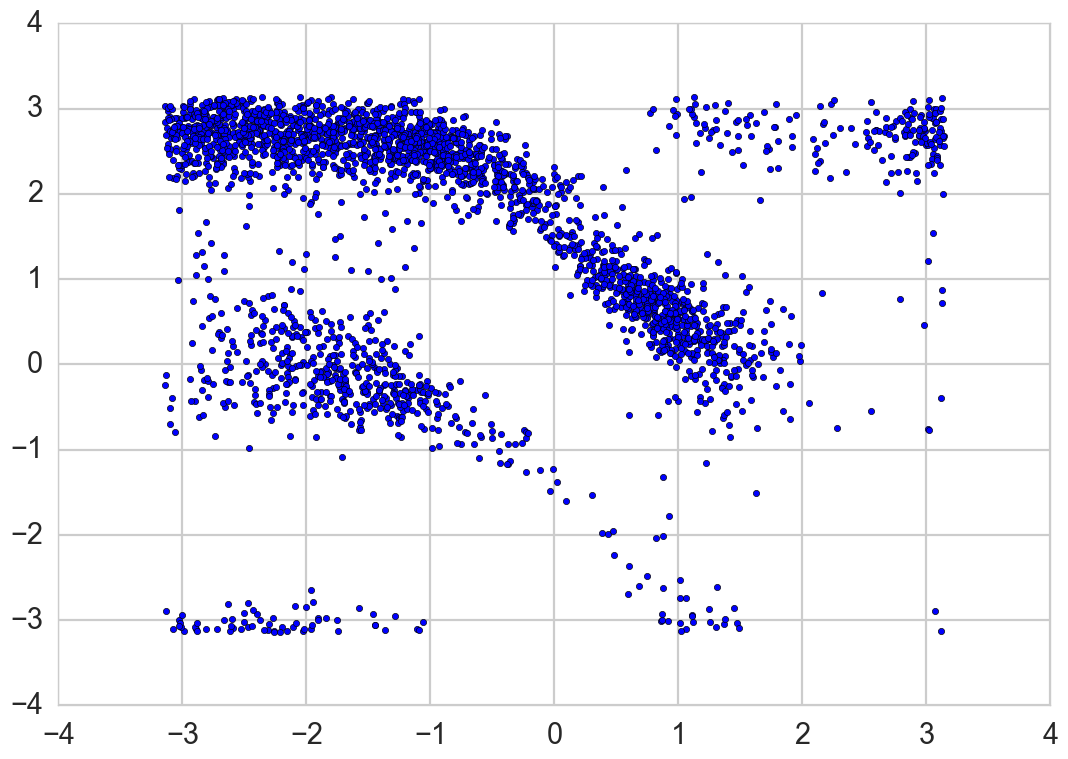

In [9]:
scatter(plot_test_feat[:,0],plot_test_feat[:,1])

## Notes: Our automatic SML based CV are often more efficient that randomly picking but if we pick the right CV based off expert knowledge than it is likely that the SML based model might perform poorly. However, this intuition likely fails in higher dimensions so we believe SML based CVs will perform better there. 